In [26]:
%matplotlib inline
import random
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
from glob import glob
import re
from skimage.io import imread
import tensorflow as tf



import keras

In [2]:
all_images_list = glob(os.path.join('tiff_images','*.tif'))



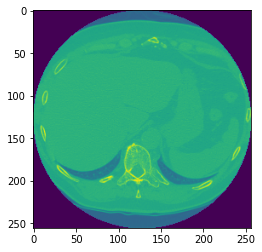

In [3]:
jimread = lambda x: np.expand_dims(imread(x)[::2,::2],0)
test_image = jimread(all_images_list[0])
plt.imshow(test_image[0])

In [4]:
check_contrast = re.compile(r'ID_([\d]+)_AGE_[\d]+_CONTRAST_([\d]+)_CT')
label = []
id_list = []
for image in all_images_list:
    id_list.append(check_contrast.findall(image)[0][0])
    label.append(check_contrast.findall(image)[0][1])

In [5]:
label_list = pd.DataFrame(label,id_list)

In [6]:
images = np.stack([jimread(i) for i in all_images_list],0)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, label_list, test_size=0.1, random_state=0)

In [8]:
n_train, depth, width, height = X_train.shape
n_test,_,_,_ = X_test.shape

input_shape = (width,height,depth)

input_train = X_train.reshape((n_train, width,height,depth))
input_train.shape
input_train.astype('float32')
input_train = input_train / np.max(input_train)


In [9]:
from keras.utils import np_utils


input_test = X_test.reshape(n_test, *input_shape)
input_test.astype('float32')
input_test = input_test / np.max(input_test)

output_train = keras.utils.np_utils.to_categorical(y_train, 2)
output_test = keras.utils.np_utils.to_categorical(y_test, 2)


In [13]:
model = tf.keras.models.load_model('model.h5')



In [20]:

predictions = model.predict(input_test)
predicted_val = [int(round(p[0])) for p in predictions]

predict result
Not Contrast
----------------------------
acturally result
Not Contrast


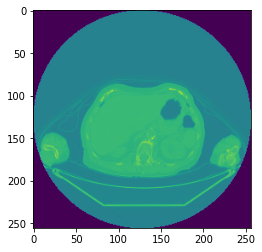

In [79]:
tmp = random.randint(0, len(input_test)-1  )  
plt.imshow(X_test[tmp][0])

print('predict result')
if predicted_val[tmp] == 0:
    print('Contrast')
else:
    print('Not Contrast')

print('----------------------------')
print('acturally result')
if y_test[0][tmp] == 1:
    print('Contrast')
else:
    print('Not Contrast')